In [444]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt
import random
from copy import deepcopy
UBIT = 'pravi'
np.random.seed(sum([ord(a) for a in UBIT]))

In [449]:
X = [[5.9,3.2],
     [4.6,2.9],
     [6.2,2.8],
     [4.7,3.2],
     [5.5,4.2],
     [5.0,3.0],
     [4.9,3.1],
     [6.7,3.1],
     [5.1,3.8],
     [6.0,3.0]]
X = np.asarray(X)
mu = [[6.2,3.2],
     [6.6,3.7],
     [6.5,3.0]]
mu = np.asarray(mu)
color = ['r','g','b']

In [450]:
def color_cluster(point):
    for i in range(len(color)):
        if point == i:
            return color[i]

In [470]:
def plot_points_mu(X,mu,clusters,filename,out = False):
    for i in range(X.shape[0]):
        plt.scatter(X[i,0],X[i,1],marker = '^',edgecolor =color_cluster(clusters[i]), facecolor = 'none')
        plt.text(X[i,0],X[i,1],s = "[%s,%s]"%(X[i,0],X[i,1]))
    for i in range(len(mu)):
        plt.scatter(mu[i][0],mu[i][1],c = color[i],marker = 'o')
        plt.text(mu[i][0],mu[i][1],np.around(mu[i],3))
    if out:
        plt.savefig(filename)

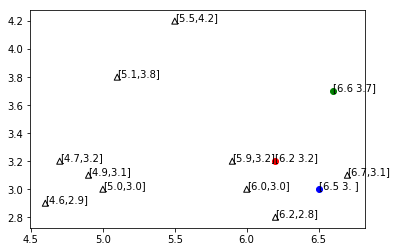

In [471]:
for i in range(X.shape[0]):
        plt.scatter(X[i,0],X[i,1],marker = '^',edgecolor ='black', facecolor = 'none')
        plt.text(X[i,0],X[i,1],s = "[%s,%s]"%(X[i,0],X[i,1]))
for i in range(len(mu)):
        plt.scatter(mu[i][0],mu[i][1],c = color[i],marker = 'o')
        plt.text(mu[i][0],mu[i][1],mu[i])
#plt.savefig('task3_iter1_a.jpg')

In [472]:
def dist(a, b):
    return np.linalg.norm(a - b)

In [473]:
def find_clusters(X,C,k):
    clusters = np.zeros(len(X))
    for i in range(len(X)):
        distances = []
        for j in range(C.shape[0]):
            distances.append(dist(X[i], C[j]))
        cluster = np.argmin(distances)
        clusters[i] = cluster
    return clusters

In [474]:
def update_mean(k,clusters):
    points = np.zeros(k)
    mu_new = []
    for i in range(k):
        points = np.array([X[j] for j in range(len(X)) if clusters[j] == i])
        sum_x = 0
        sum_y = 0
        for j in points:
            sum_x += j[0] 
            sum_y += j[1] 
        mean_x = sum_x/len(points)
        mean_y = sum_y/len(points)
        mean = [mean_x,mean_y]
        mu_new.append(mean)
    return mu_new

[0. 0. 2. 0. 1. 0. 0. 2. 0. 0.]


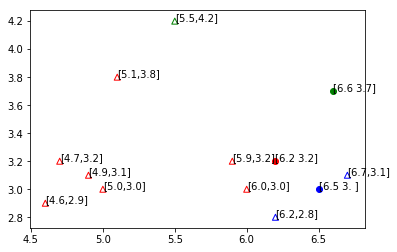

In [475]:
clusters = find_clusters(X,mu,3)
plot_points_mu(X,mu,clusters,'task3_iter1_a.jpg',True)
print(clusters)

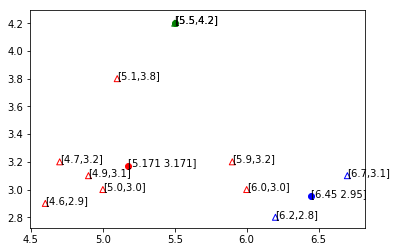

In [476]:
mu_new = update_mean(3,clusters)
plot_points_mu(X,mu_new,clusters,'task3_iter1_b.jpg',True)

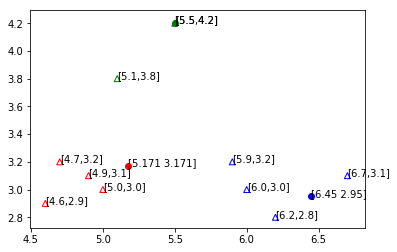

In [477]:
mu_new = update_mean(3,clusters)
clusters_new = find_clusters(X,np.asarray(mu_new),3)
plot_points_mu(X,mu_new,clusters_new,'task3_iter2_a.jpg',True)

[[4.800000000000001, 3.05], [5.3, 4.0], [6.2, 3.025]]
[2. 0. 2. 0. 1. 0. 0. 2. 1. 2.]


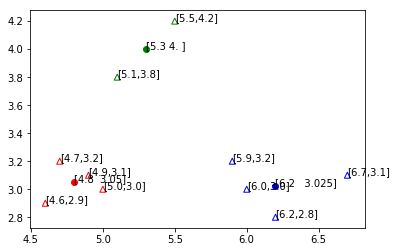

In [478]:
mu_new2 = update_mean(3,clusters_new)
print(mu_new2)
clusters_new2 = find_clusters(X,np.asarray(mu_new2),3)
print(clusters_new2)
plot_points_mu(X,np.asarray(mu_new2),clusters_new2,'task3_iter2_b.jpg',True)

# 3.4

In [409]:
img = cv.imread('baboon.jpg')

In [410]:
img = img.reshape(img.shape[0]*img.shape[1],3)

In [411]:
def initial_mu(img,k):
    mu = []
    mu_new = []
    for i in range(k):
        mu.append(np.random.randint(low=0,high=255,size=3).tolist())
        mu_new.append(np.random.randint(low=0,high=255,size=3).tolist())
    #return mu
    return mu,mu_new

In [412]:
def dist_3d(x1,y1,z1,x2,y2,z2):
    d1 = (x1-x2)*(x1-x2)
    d2 = (y1-y2)*(y1-y2)
    d3 = (z1-z2)*(z1-z2)
    res = np.sqrt(d1+d2+d3)
    return res

In [413]:
def find_clusters(img,C,k):
    clusters = []
    for i in img:
        distances = []
        for j in C:
            distances.append(dist_3d(i[0],i[1],i[2],j[0],j[1],j[2]))
        cluster = np.argmin(distances)
        clusters.append(cluster)
    return clusters

In [414]:
def find_clusters_try(img,C,k):
    clusters = []
    for i in range(img.shape[0]):
        distances = []
        for j in range(len(C)):
            distances.append(dist_3d(img[i][0],img[i][1],img[i][2],C[j][0],C[j][1],C[j][2]))
        cluster = np.argmin(distances)
        clusters.append(cluster)
    return clusters

In [415]:
def update_mean(k,clusters):
    points = np.zeros(k)
    mu_new = []
    for i in range(k):
        points = np.array([img[j] for j in range(img.shape[0]) if clusters[j] == i])
        sum_x = 0
        sum_y = 0
        sum_z = 0
        if len(points) == 0:
            mean = [0,0,0]
        else:
            for j in points:
                sum_x += j[0] 
                sum_y += j[1] 
                sum_z += j[2]
            mean_x = sum_x/len(points)
            mean_y = sum_y/len(points)
            mean_z = sum_z/len(points)
            mean = [mean_x,mean_y,mean_z]
        mu_new.append(mean)
    return mu_new

In [416]:
def exit_compare(mu_new,mu_old):
    for i in range(0,len(mu_new)):
        for j in range(0,len(mu_new[0])):
            if mu_new[i][j] - mu_old[i][j] > 5:
                return 1
    return 0            

In [417]:
def change_3d(img,clusters,mu):
    temp = 0
    output = cv.imread('baboon.jpg')
    for i in range(0,output.shape[0]):
        for j in range(0,output.shape[1]):
            output[i][j] = mu[clusters[temp]]
            temp += 1
    return output


In [396]:
def baboon(k,img,filename):
    mu,prev_mu = initial_mu(img,k)
    while(exit_compare(mu,prev_mu)):
        prev_mu = mu.copy()
        clusters = find_clusters_try(img,mu,k)
        mu_new = update_mean(k,clusters)
        print(mu_new)
        mu = mu_new.copy()
    img_new = change_3d(img,clusters,mu_new)
    cv.imwrite(filepath,img_new)


In [397]:
baboon(3,img,'task3_baboon_3.jpg')
baboon(5,img,'task3_baboon_5.jpg')
baboon(10,img,'task3_baboon_10.jpg')
baboon(20,img,'task3_baboon_20.jpg')

[[180, 235, 210], [174, 157, 136], [179, 150, 204], [40, 186, 139], [186, 199, 140], [129, 126, 246], [28, 54, 58], [214, 172, 175], [73, 188, 72], [140, 202, 121], [51, 180, 47], [85, 200, 212], [164, 200, 5], [68, 84, 103], [10, 69, 242], [43, 109, 126], [163, 161, 64], [112, 228, 110], [151, 238, 178], [93, 180, 254]]
[[183.25365853658536, 208.7658536585366, 199.41613508442776], [149.04119416801666, 151.83545475584356, 134.17698449433001], [160.97886836027715, 165.37401847575057, 194.06581986143186], [74.62300247580464, 156.29282016655412, 156.49538600045014], [215.43343000263644, 188.58781966780913, 131.67756393356183], [102.55398735821284, 105.3027967789419, 226.30409559269202], [42.063377665502635, 53.75733709785274, 54.37788840181291], [217.10278130735563, 194.53983716880794, 166.47686949974116], [96.73739130434782, 146.55826086956523, 104.16347826086957], [119.65995712243925, 167.21450690805145, 143.849094807051], [42.75, 130.0, 67.25], [90.82386210611365, 175.2053595475357, 19